## Observations and Insights 

In [25]:
%matplotlib notebook

In [26]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from sklearn import datasets


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
#mouse_metadata
#mouse_metadata.columns

study_results = pd.read_csv(study_results_path)
#study_results

# Combine the data into a single dataset
CombinedMouseStudy_df = pd.merge(study_results, mouse_metadata,  how = 'left', on = "Mouse ID" )
CombinedMouseStudy_df

# Display the data table for preview
CombinedMouseStudy_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [27]:
# Checking the number of mice.
TotalMice = CombinedMouseStudy_df["Mouse ID"].nunique()
TotalMice

249

In [28]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

#CombinedMouseStudy_df.shape
#CombinedMouseStudy_df.duplicated(subset=['Mouse ID', 'Timepoint']).sum()

DuplicateMice = CombinedMouseStudy_df.loc[CombinedMouseStudy_df.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
DuplicateMice


array(['g989'], dtype=object)

In [29]:
# Optional: Get all the data for the duplicate mouse ID. 
DuplicateMice_df = CombinedMouseStudy_df.loc[CombinedMouseStudy_df["Mouse ID"] == 'g989']
DuplicateMice_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [30]:
#Create a clean DataFrame by dropping the duplicate mouse by its ID.


cleaned_mouse_study_df1 = pd.DataFrame(CombinedMouseStudy_df)

cleaned_mouse_study_df1.rename(columns={'Mouse ID': 'Mouse_ID', 'Timepoint' : 'Time_Point',
                                        'Tumor Volume (mm3)': 'Tumor_Volume',
                                        'Metastatic Sites' : 'Metastatic_Sites',
                                        'Drug Regimen' : 'Drug_Regimen',
                                        'Age_months' : 'Age Months',
                                        'Weight (g)' : 'Weight'
                                       }, inplace=True)

#cleaned_mouse_study_df1.head()
#(1893, 8)


CleanedMouseStudy_df = cleaned_mouse_study_df1[cleaned_mouse_study_df1["Mouse_ID"].isin(["g989"]) == False]


#CleanedMouseStudy_df.shape  #(1880, 8)

CleanedMouseStudy_df.head()



,Mouse_ID,Time_Point,Tumor_Volume,Metastatic_Sites,Drug_Regimen,Sex,Age Months,Weight
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [31]:
# Checking the number of mice in the clean DataFrame.
len(CleanedMouseStudy_df["Mouse_ID"].unique())

248

## Summary Statistics

In [32]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.

# CleanedMouseStudy_df.describe()
# CleanedMouseStudy_df.describe().transpose()

TumorVolSummaryMean = CleanedMouseStudy_df.groupby("Drug_Regimen").mean()["Tumor_Volume"].rename("TumorVol Mean")
#TumorVolSummaryMean

TumorVolSummaryMedian = CleanedMouseStudy_df.groupby("Drug_Regimen").median()["Tumor_Volume"].rename("TumorVol Median")
#TumorVolSummaryMedian

TumorVolSummaryVariance = CleanedMouseStudy_df.groupby("Drug_Regimen").var()["Tumor_Volume"].rename("TumorVol Variance")
#TumorVolSummaryVariance

TumorVolSummarySTD = CleanedMouseStudy_df.groupby("Drug_Regimen").std()["Tumor_Volume"].rename("TumorVol StdDev")
#TumorVolSummarySTD

TumorVolSummarySEM = CleanedMouseStudy_df.groupby("Drug_Regimen").sem()["Tumor_Volume"].rename("TumorVol StdErr")
#TumorVolSummarySEM

TumorVolSummary = pd.concat([TumorVolSummaryMean,TumorVolSummaryMedian, TumorVolSummaryVariance, 
                             TumorVolSummarySTD, TumorVolSummarySEM], axis = 1)
TumorVolSummary




,TumorVol Mean,TumorVol Median,TumorVol Variance,TumorVol StdDev,TumorVol StdErr
Drug_Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [33]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function

TumorVolSummary1 = CleanedMouseStudy_df.groupby("Drug_Regimen")
TumorVolSummary2 = TumorVolSummary1.agg(["mean","median","var","std","sem"])["Tumor_Volume"]
TumorVolSummary2


,mean,median,var,std,sem
Drug_Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<IPython.core.display.Javascript object>


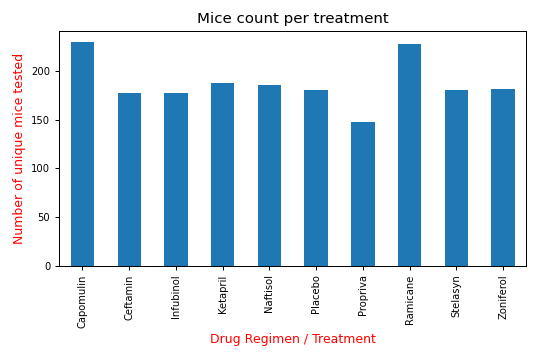

In [34]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
MiceCountPerTreatment_pandas = CleanedMouseStudy_df.groupby(["Drug_Regimen"]).count()["Mouse_ID"]


Barplot = MiceCountPerTreatment_pandas.plot.bar(figsize = (6,4), fontsize = 8, title = "Mice count per treatment")
Barplot.set_xlabel("Drug Regimen / Treatment", color = "r")
Barplot.set_ylabel("Number of unique mice tested", color = "r")

# saving the image
plt.savefig("images/MiceCountPerTreatment_pandas_Fig.jpg", bbox_inches = 'tight')
plt.tight_layout()
plt.show()


<IPython.core.display.Javascript object>


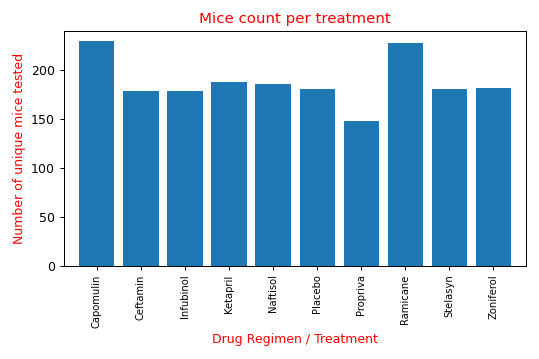

In [35]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

MiceCountPerTreatment_pyplot = CleanedMouseStudy_df.groupby(["Drug_Regimen"]).count()["Mouse_ID"]

#MiceCountPerTreatment_pyplot

fig, ax=plt.subplots(1, figsize=(6, 4))

y_axis =  MiceCountPerTreatment_pyplot.tolist()
y_axis

x_axis = np.arange(len(MiceCountPerTreatment_pyplot))

plt.bar(x_axis, y_axis, align = "center")

#To place x axis headers
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin","Ceftamin","Infubinol","Ketapril","Naftisol","Placebo",
                            "Propriva","Ramicane","Stelasyn","Zoniferol"], fontsize = 8, rotation = "vertical")

# Sets the x limits of the current chart
plt.xlim(-0.75, len(x_axis)-0.25)

# Sets the y limits of the current chart
plt.ylim(0, max(y_axis)+10)


plt.title("Mice count per treatment", color = "r")
plt.xlabel("Drug Regimen / Treatment", color = "r")
plt.ylabel("Number of unique mice tested", color = "r")

plt.tight_layout()

# saving the image
plt.savefig("images/MiceCountPerTreatment_pyplot_Fig.jpg", bbox_inches = 'tight')
plt.show()


In [36]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# group by gender and find percentages for the population

gender_groupby = CleanedMouseStudy_df.groupby(["Mouse_ID", "Sex"])

#gender_df = pd.DataFrame(gender_groupby.count())
gender_df = pd.DataFrame(gender_groupby.size())
#gender_df

gender_mouse = pd.DataFrame(gender_df.groupby(["Sex"]).count())
gender_mouse.columns = ["Count"]

#gender_mouse["% of Sex"] = (100*(gender_mouse["Count"]/ gender_mouse["Count"].sum())).astype(int)
gender_mouse["% of Sex"] = (100*(gender_mouse["Count"]/ gender_mouse["Count"].sum()))

gender_mouse




,Count,% of Sex
Sex,,
Female,123,49.596774
Male,125,50.403226


<IPython.core.display.Javascript object>


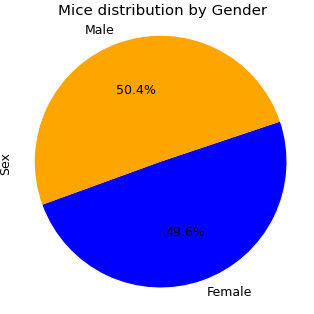

In [37]:
colors = ["blue", "orange"]
#explode = (0.01, 0)


GenderDistribution_Pandas = gender_mouse.plot(kind = "pie", y = "% of Sex", startangle = 200, colors = colors,
                                              autopct = "%1.1f%%", title = "Mice distribution by Gender", 
                                              legend = False)


GenderDistribution_Pandas.set_ylabel("Sex")
GenderDistribution_Pandas.axis("equal")

# saving the image
plt.savefig("images/GenderDistribution_Fig.jpg", bbox_inches = 'tight')
plt.tight_layout()
fig = plt.gcf()
fig.set_size_inches(3.5,3.5)
plt.show()

<IPython.core.display.Javascript object>


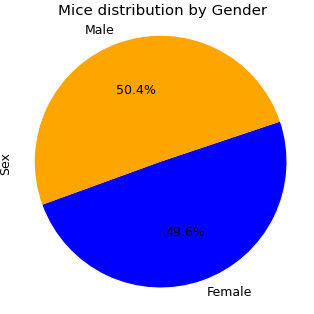

In [38]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender = ["Female", "Male"]
percentages = [49.596774, 50.403226]
colors = ["blue", "orange"]

plt.pie(percentages, labels = gender, colors = colors,
        autopct ="%1.1f%%", startangle = 200)

plt.title("Mice distribution by Gender")
plt.ylabel("Sex")
plt.axis("equal")


# saving the image
plt.savefig("images/GenderDistribution_Pyplot.jpg", bbox_inches = 'tight')
plt.tight_layout()
fig = plt.gcf()
fig.set_size_inches(3.5,3.5)
plt.show()

## Quartiles, Outliers and Boxplots

In [39]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

max_timepoint = CleanedMouseStudy_df.groupby(["Mouse_ID"])["Time_Point"].max()

max_timepoint = max_timepoint.reset_index()

max_timepoint;

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

tumor_vol_df= pd.merge(max_timepoint, CleanedMouseStudy_df, on=["Mouse_ID", "Time_Point"], how="left")
tumor_vol_df


,Mouse_ID,Time_Point,Tumor_Volume,Metastatic_Sites,Drug_Regimen,Sex,Age Months,Weight
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [40]:
CleanedMouseStudy_df.to_excel('results.xlsx')

In [41]:
# Below code as discussed with the instructor / TA`s

# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ("Capomulin", "Ramicane", "Infubinol", "Ceftamin")

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for drug in treatment_list:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = tumor_vol_df.loc[tumor_vol_df["Drug_Regimen"] == drug, "Tumor_Volume"]
    
    # add subset 
    tumor_vol_list.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound =  lowerq - (1.5*iqr)
    upper_bound =  upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    
    print(f"{drug}`s potential outliers: {outliers}")
    

Capomulin`s potential outliers: Series([], Name: Tumor_Volume, dtype: float64)
Ramicane`s potential outliers: Series([], Name: Tumor_Volume, dtype: float64)
Infubinol`s potential outliers: 31    36.321346
Name: Tumor_Volume, dtype: float64
Ceftamin`s potential outliers: Series([], Name: Tumor_Volume, dtype: float64)


<IPython.core.display.Javascript object>


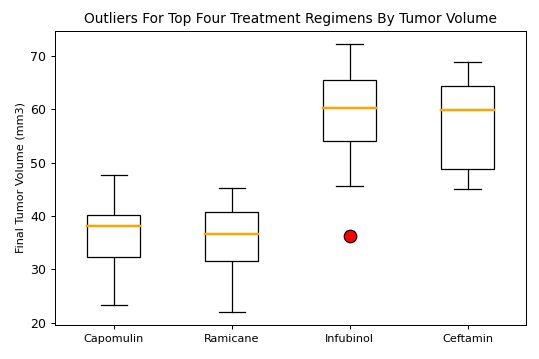

In [42]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


fig, ax=plt.subplots(1, figsize=(6, 4))
bp=ax.boxplot(tumor_vol_list, patch_artist=True)
ax.set_title('Outliers For Top Four Treatment Regimens By Tumor Volume', fontsize=11)
ax.set_ylabel('Final Tumor Volume (mm3)', fontsize=9, color='black')
ax.set_xticklabels(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'], fontsize=9, color='black')

# Change fill color:
for box in bp['boxes']:
    box.set(facecolor='white')

# Change color and linewidth of the medians:
for median in bp['medians']:
    median.set(color='orange', linewidth=2)

# Change the fill and style of fliers:
for flier in bp['fliers']:
    flier.set(marker='o', markersize=10, markerfacecolor='red', alpha=1)

# saving the image
plt.savefig('images/OutliersForTopFourTreatmentRegimensByTumorVolume.jpg', bbox_inches = 'tight')
plt.tight_layout()
plt.show()

## Line and Scatter Plots

<IPython.core.display.Javascript object>


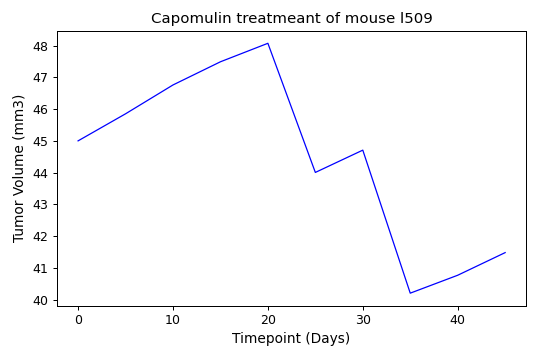

In [43]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

Capomulin_df = CleanedMouseStudy_df.loc[CleanedMouseStudy_df['Drug_Regimen'] == 'Capomulin', :]

Capomulin_df;

line_df = Capomulin_df.loc[Capomulin_df['Mouse_ID'] == 'l509',:]
line_df;


#plot the line
x_axis = line_df['Time_Point']
TumorVolume = line_df['Tumor_Volume']

fig1, ax1 = plt.subplots(figsize=(6, 4))
plt.title('Capomulin treatmeant of mouse l509',fontsize =12)
plt.plot(x_axis, TumorVolume,linewidth=1, markersize=11,color='blue')  #, label="Fahreneit"
plt.xlabel('Timepoint (Days)',fontsize =11)
plt.ylabel('Tumor Volume (mm3)',fontsize =11)


plt.savefig('images/CapomulinTreatmeantOfMousel509_Line_Plot.jpg', bbox_inches = 'tight')
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


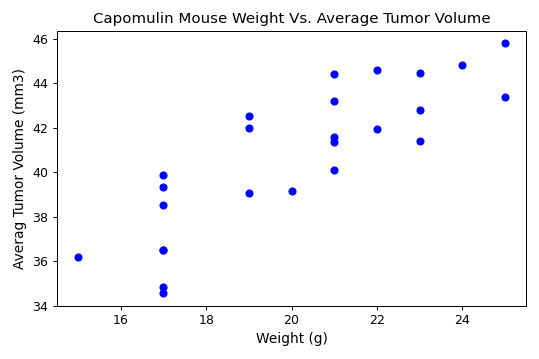

In [47]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

Capomulin_df = CleanedMouseStudy_df.loc[CleanedMouseStudy_df['Drug_Regimen'] == 'Capomulin', :]
Capomulin_df

fig1, ax1 = plt.subplots(figsize=(6, 4))
Avg_Tumor_Vol_Capomulin = Capomulin_df.groupby(['Mouse_ID']).mean()

marker_size=11
plt.scatter(Avg_Tumor_Vol_Capomulin['Weight'],Avg_Tumor_Vol_Capomulin['Tumor_Volume'],s=30, color='blue')
plt.title('Capomulin Mouse Weight Vs. Average Tumor Volume',fontsize =12)
plt.xlabel('Weight (g)',fontsize =11)
plt.ylabel('Averag Tumor Volume (mm3)',fontsize =11)


plt.savefig('images/CapomulinMouseWeightVs.AverageTumorVolumScatterplot.jpg', bbox_inches = 'tight')
plt.tight_layout()
plt.show()


## Correlation and Regression

In [48]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
CorrelationCoeff = round(st.pearsonr(Avg_Tumor_Vol_Capomulin['Weight'],Avg_Tumor_Vol_Capomulin['Tumor_Volume'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {CorrelationCoeff}")

The correlation between mouse weight and average tumor volume is 0.84


In [49]:
x_values = Avg_Tumor_Vol_Capomulin["Weight"]
y_values = Avg_Tumor_Vol_Capomulin["Tumor_Volume"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue (Correlation coefficient):{rvalue}")
print(f"pandas (Correlation coefficient):{CorrelationCoeff}")
print(f"stderr:{stderr}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)

slope:0.9544396890241045
intercept:21.552160532685015
rvalue (Correlation coefficient):0.8419363424694718
pandas (Correlation coefficient):0.84
stderr:0.1275435903320134
y = 0.95x + 21.55


<IPython.core.display.Javascript object>


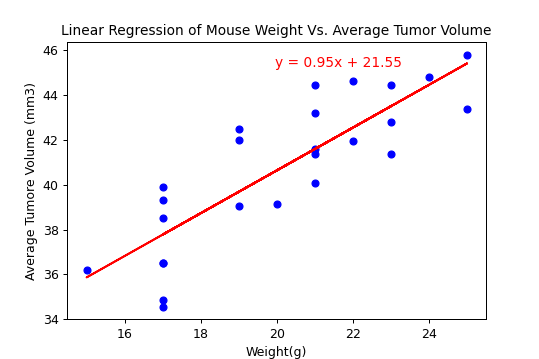

The r-squared is: 0.7088568047708717


In [50]:
# Add the linear regression equation and line to plot
fig1, ax1 = plt.subplots(figsize=(6, 4))

plt.scatter(x_values, y_values,s=30, color ='blue')
                         
plt.plot(x_values,regress_values,"r-")
plt.title('Linear Regression of Mouse Weight Vs. Average Tumor Volume',fontsize =11)
plt.xlabel('Weight(g)',fontsize =10)
plt.ylabel('Average Tumore Volume (mm3)',fontsize =10)
ax1.annotate(line_eq, xy=(20, 40), xycoords='data',xytext=(0.8, 0.95), 
             textcoords='axes fraction', horizontalalignment='right', verticalalignment='top',fontsize=11, color="red")

print(f"The r-squared is: {rvalue**2}")

plt.savefig("images/LinearRegressionOfMouseWeightVs.AverageTumorVolume.jpg", bbox_inches = "tight")
plt.show()